In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("files/df_nulos_imputados.csv", index_col=0)

In [3]:
df_original = pd.read_csv("files/HR_RAW_DATA.csv", index_col=0)

In [4]:
df_original.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


# Reporte de resultados

### 1. Datos incompletos.

Tras en análisis de los datos, lo primero que encontramos es una elevada cantidad de datos incompletos. Una recopilación cuidadosa de los datos aporta mucha precision a la hora de realizar cualquier análisis posterior. Una de nuestras recomendaciones a la empresa sería la de ser más precisos en esta tarea. 

In [6]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(df_original.isna().sum()/df_original.shape[0]*100, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]
#podemos ver que hay dos columnas que tienen un elevado porcentaje de nulos (casi un 90%). Más adelante veremos cómo lo gestionaremos.

,%_nulos
BusinessTravel,47.831475
Department,81.288724
EducationField,46.158612
employeenumber,26.703841
MaritalStatus,40.334572
MonthlyIncome,52.230483
Over18,55.824040
OverTime,41.883519
PerformanceRating,12.081784
StandardHours,74.039653


Algunas de las columnas, como NumberChildren, no contienen datos. Tener datos en esta columna aportaría información valiosa a la empresa para la gestión de temas que influyen en la satisfacción de los empleados, como es la conciliación familiar. 

### 2. Recopilación no uniforme de los datos.

Algunos de los datos que la empresa ha recopilado, no tienen mucho sentido. Por ejemplo, a la hora de hacer las encuestas, se les ha pedido a los empleados que respondan acerca de su grado de satisfacción con diferentes aspectos del trabajo en una escala del 1 al 4. Algunas de las respuestas obtenidas estań en números del 1 al 50. Ante esta situación, hemos tenido que tomar decisiones sobre qué hacer con éstos:¿tomarlos como una escala del 1 al 50?¿tomarlos como si fueran, enrrealidad, números decimales?

In [7]:
df_original['EnvironmentSatisfaction'].unique()
# los valores están descritos del 1 al 50, no del 1 al 4. Probablemente sea porque lo han querido hacer como decimal pero no le han puesto el . 
# no podemos sacar conclusiones con los datos de esta manera

array([ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12,
       13, 28, 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38,
       17, 20, 26, 43])

In [ ]:
def scatter (x_value, y_value, dots_color, dots_size, x_label, y_label, title_value, dots_transparency = 0.7, size = (10 , 6)):
    """
    Crea un gráfico de dispersión utilizando Matplotlib.
    Parámetros:
    - x_value: Valores para el eje x.
    - y_value: Valores para el eje y.
    - dots_color: Color de los puntos del gráfico de dispersión.
    - dots_size: Tamaño de los puntos del gráfico de dispersión.
    - x_label: Etiqueta del eje x.
    - y_label: Etiqueta del eje y.
    - title_value: Título del gráfico.
    - dots_transparency: Transparencia de los puntos (opcional, por defecto es 0.7).
    - size: Tamaño de la figura del gráfico (opcional, por defecto es (10, 6)).
    Retorna:
    No retorna ningún valor. Muestra el gráfico de dispersión.
    Esta función utiliza Matplotlib para crear un gráfico de dispersión a partir de los datos proporcionados.
    Permite especificar los valores en los ejes x e y, el color y el tamaño de los puntos, así como las etiquetas
    de los ejes y el título del gráfico.
    Ejemplo de uso:
    scatter(x_value=data['Altura'],
            y_value=data['Peso'],
            dots_color='blue',
            dots_size=30,
            x_label='Altura (cm)',
            y_label='Peso (kg)',
            title_value='Relación entre Altura y Peso',
            dots_transparency=0.5,
            size=(8, 6))
    """
    plt.figure(figsize= size)
    plt.scatter(x_value,
                y_value,
                color = dots_color,
                s = dots_size,
                alpha = dots_transparency)
    plt.title(title_value)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

### 3. Edad

El siguiente gráfico muestra la distribución de los empleados. Los picos de edades están entra los 30 y 40 años. 

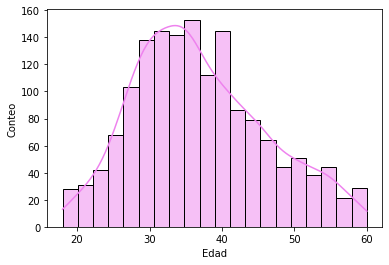

In [14]:
sns.histplot(x = "Age", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 )

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("Edad")

# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("Conteo");

In [26]:
def barplot (x_value, y_value, data_value, palette_value , hue_value, legend_title, show_legend, x_label, y_label, title_value, size = (10 , 6)):
    """
    Crea un gráfico de barras utilizando Seaborn.
    Parámetros:
    - x_value: Nombre de la columna en el DataFrame que se utilizará en el eje x.
    - y_value: Nombre de la columna en el DataFrame que se utilizará en el eje y.
    - data_value: DataFrame que contiene los datos a graficar.
    - palette_value: Paleta de colores a utilizar en las barras.
    - hue_value: Nombre de la columna en el DataFrame para agrupar y colorear las barras.
    - legend_title: Título de la leyenda del gráfico.
    - x_label: Etiqueta del eje x.
    - y_label: Etiqueta del eje y.
    - title_value: Título del gráfico.
    - size: Tamaño de la figura del gráfico (opcional, por defecto es (10, 6)).
    Retorna:
    No retorna ningún valor. Muestra el gráfico de barras.
    Esta función utiliza Seaborn para crear un gráfico de barras a partir de los datos proporcionados.
    Permite especificar el eje x, el eje y, la paleta de colores, la agrupación por categoría y la inclusión de una leyenda.
    Ejemplo de uso:
    barplot(x_value='Year',
            y_value='Revenue',
            data_value=yearly_data,
            palette_value='Blues',
            hue_value='Category',
            legend_title='Product Category',
            x_label='Año',
            y_label='Ingresos',
            title_value='Ingresos Anuales por Categoría de Producto',
            size=(12, 8))
    """
    plt.figure(figsize= size)
    sns.barplot(data = data_value,
                x = x_value,
                y = y_value,
                hue = hue_value,
                palette = palette_value)
    if show_legend and hue_value:
        plt.legend(title=legend_title)
    plt.title(title_value)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

### Relación entre el salario y el puesto entre los dos géneros

- Lo primero que nos llama la atención es que no existe una jerarquía clara entre salarios de distintas responsabilidades. Por ejemplo, cabe esperar que de acuerdo con la jerarquía de puestos dentro de la empresa, el salario vaya acorde con éste. 
- Lo siguiente es la diferencia en el promedio de salarios entre hombres y mujeres en los diferentes puestos. 

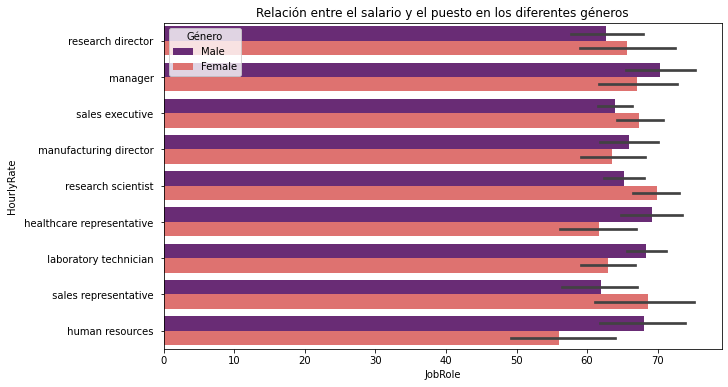

In [29]:
barplot('HourlyRate','JobRole', df, 'magma', 'Gender', 'Género', True, 'JobRole','HourlyRate','Relación entre el salario y el puesto en los diferentes géneros') 

## 4. HourlyRate 

La distribución del salario 

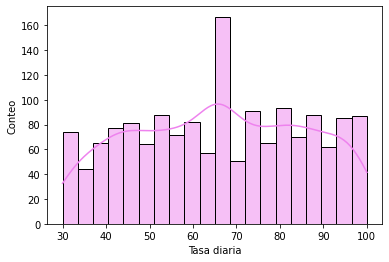

In [17]:
sns.histplot(x = "HourlyRate", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 )

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("Tasa diaria")

# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("Conteo");

### 5. DistanceFromHome

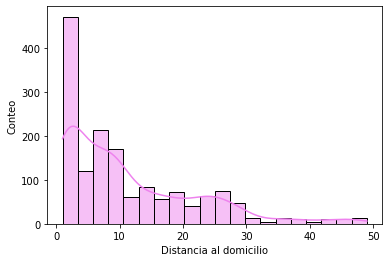

In [16]:
sns.histplot(x = "DistanceFromHome", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 )

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("Distancia al domicilio")

# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("Conteo");

In [ ]:
scatter ()